In [38]:
import numpy as np
import pandas as pd
import os
import sys
from google.colab import drive
import matplotlib.pyplot as plt
import math
import itertools
import random
import seaborn as sns
# import package
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster, leaders
from scipy.cluster import hierarchy
from scipy.sparse import csr_matrix
import networkx as nx
import seaborn as sns
import math

sc = StandardScaler()

sns.set_style("ticks")

sns.despine()

<Figure size 432x288 with 0 Axes>

In [39]:
#mount google colab
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [40]:

# import source data

# source data
influenceFile = "/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/influence_data.csv"
fullFileRes = "/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/full_music_data.csv"
artistFile = "/content/drive/MyDrive/Richard_FRL/Project Data/2021_ICM_Problem_D_Data/data_by_artist.csv"

# read data
fullData = pd.read_csv(fullFileRes)
influenceData = pd.read_csv(influenceFile)
artistData = pd.read_csv(artistFile)


In [41]:
influenceData.columns

Index(['influencer_id', 'influencer_name', 'influencer_main_genre',
       'influencer_active_start', 'follower_id', 'follower_name',
       'follower_main_genre', 'follower_active_start'],
      dtype='object')

In [42]:
influenceData['influencer_active_start'].value_counts()

1960    12640
1970     7996
1950     6643
1980     6083
1990     3646
1940     2957
1930     2409
2000      376
2010       20
Name: influencer_active_start, dtype: int64

In [43]:
active_start = {'1930':1,'1940':2,'1950':3,'1960':4,'1970':5,'1980':6,'1990':7,'2000':8,'2010':9}

In [44]:

# const genre group

genre = {'Pop/Rock':0, 'R&B;':1, 'Country':2, 'Jazz':3, 'Vocal':4, 'Latin':5, 'Classical':6, 'Folk':7, 'International':8, 'Blues':9, 'Reggae':10, 'Electronic':11, 'Easy Listening':12, 'Stage & Screen':13, 'Religious': 14, 'Comedy/Spoken':15, 'New Age':16, 'Avant-Garde':17, "Children's": 18, 'Unknown': 19}

In [45]:
def cleanData(data):
    cleaned_data = data.drop_duplicates(keep='first',inplace=False).loc[:, ~data.columns.str.contains("^Unnamed")].dropna(axis=1,how='all').dropna(axis=0, how='any')
    return cleaned_data

In [46]:
# clean data

fullData = cleanData(fullData)
artistData = cleanData(artistData)


In [47]:
genre_res = pd.DataFrame(index=artistData.index, columns=['genre'])
active_start_res = pd.DataFrame(index=artistData.index, columns=['active_start_year'])

for row_index, row in artistData['artist_id'].items():
    _tem = (influenceData.loc[(influenceData['influencer_id'] == row) | (influenceData['follower_id'] == row)]['influencer_main_genre'])
    if _tem.shape[0] != 0:
        genre_res['genre'][row_index] = _tem.iloc[0]

for row_index, row in artistData['artist_id'].items():
    _tem = (influenceData.loc[(influenceData['influencer_id'] == row) | (influenceData['follower_id'] == row)]['influencer_active_start'])
    if _tem.shape[0] != 0:
        active_start_res['active_start_year'][row_index] = _tem.iloc[0]

artistData_concated = pd.concat([artistData,genre_res],axis=1)
artistData_concated = pd.concat([artistData_concated,active_start_res],axis=1)
#artistData_concated.to_csv('./artistData_concated.csv')

genre_res = pd.DataFrame(index=artistData.index, columns=['genre'])
active_start_res = pd.DataFrame(index=artistData.index, columns=['active_start_year'])

In [48]:
for row_index, row in fullData['artists_id'].items():
    _tem = (influenceData.loc[(influenceData['influencer_id'] == eval(row)[0]) | (influenceData['follower_id'] == eval(row)[0])]['influencer_main_genre'])
    if _tem.shape[0] != 0:
        genre_res['genre'][row_index] = _tem.iloc[0]
        
fullData_concated = pd.concat([fullData,genre_res],axis=1)

In [49]:
artistData = artistData_concated
fullData = fullData_concated

fullData = cleanData(fullData)
artistData = cleanData(artistData)

In [50]:
artistData

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count,genre,active_start_year
0,Frank Sinatra,792507,0.384478,0.238017,0.364288,110.181698,-14.271141,1,5,0.735648,0.020855,0.232106,0.049614,189179.9255,26.004383,1369,Vocal,1930
2,Johnny Cash,816890,0.619803,0.449381,0.680662,115.037747,-11.593104,1,10,0.685637,0.022647,0.242243,0.098216,162279.2672,26.614130,1104,Country,1950
3,Billie Holiday,79016,0.572637,0.201368,0.498934,109.912172,-13.225966,1,5,0.908499,0.013064,0.217727,0.062432,185131.4530,15.621005,1095,Vocal,1930
4,Bob Dylan,66915,0.512598,0.477932,0.551934,126.160149,-11.184330,1,7,0.562567,0.034211,0.308978,0.064535,256713.4203,30.860806,1092,Pop/Rock,1960
5,The Rolling Stones,894465,0.524446,0.719915,0.655332,123.764717,-7.830265,1,0,0.293788,0.176137,0.268443,0.051440,229705.9623,34.573913,1035,Pop/Rock,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,Natalie La Rose,3359519,0.830000,0.520000,0.735000,104.990000,-8.714000,1,0,0.000792,0.000013,0.065600,0.037600,189907.0000,64.000000,1,R&B;,1970
5850,Sarah Ross,3381566,0.721000,0.944000,0.626000,85.002000,-5.982000,1,8,0.013000,0.000000,0.320000,0.159000,262760.0000,52.000000,1,Country,1930
5851,Rotimi,3410250,0.637000,0.501000,0.431000,103.993000,-6.148000,0,0,0.229000,0.000059,0.099000,0.187000,185461.0000,71.000000,1,R&B;,2000
5852,Jillian Jacqueline,3455945,0.547000,0.672000,0.283000,155.791000,-5.023000,1,11,0.304000,0.000000,0.099600,0.049600,213133.0000,58.000000,1,Country,1950


In [51]:
artistData['artist_name'].value_counts()

Prince           3
Bill Evans       3
The Outsiders    3
The Blasters     2
Peggy Lee        2
                ..
Survivor         1
Fun Boy Three    1
Plumb            1
Midtown          1
Marisela         1
Name: artist_name, Length: 5567, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


         genre active_start_year  popul_by_genre
0        Vocal              1930       23.199897
2      Country              1950       34.167854
3        Vocal              1930       23.199897
4     Pop/Rock              1960       39.051741
5     Pop/Rock              1960       39.051741
...        ...               ...             ...
5849      R&B;              1970       42.768250
5850   Country              1930       23.941411
5851      R&B;              2000       55.926793
5852   Country              1950       34.167854
5853  Pop/Rock              2000       53.565912

[5602 rows x 3 columns]


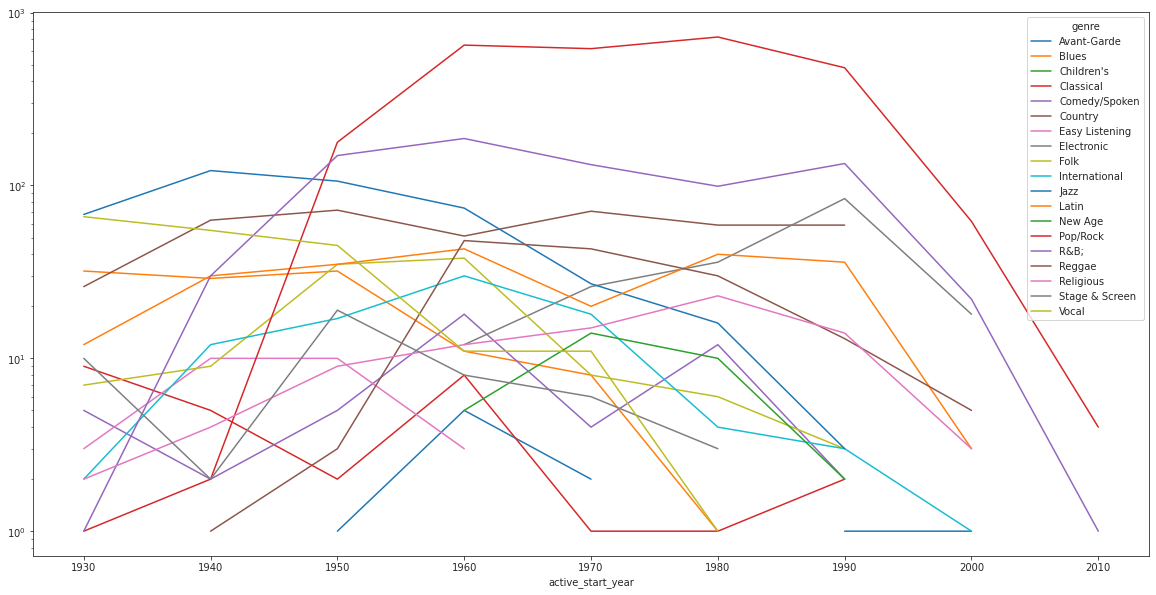

In [52]:
artistData['popul_by_artist_genre'] = artistData.groupby(['artist_name','genre'])['popularity'].transform('mean') 
artistData_plots = artistData[['genre','active_start_year','popul_by_artist_genre']]
artistData_plots['popul_by_genre'] = artistData_plots.groupby(['genre','active_start_year'])['popul_by_artist_genre'].transform('mean') 
del artistData_plots['popul_by_artist_genre'] 

print(artistData_plots)


from matplotlib import pyplot
fig, ax = plt.subplots(figsize=(20,10))
# use unstack()
dd = artistData_plots.groupby(['active_start_year','genre']).count()['popul_by_genre'].unstack()
dd.plot(ax=ax)
pyplot.yscale('log')
pyplot.show()

In [53]:
fullData

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0.0,9.0,0.06720,0.585000,0.0921,0.0498,0.0,437200.0,54.0,2005.0,2005,Ernie,Electronic
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0.0,11.0,0.01360,0.148000,0.0993,0.1310,0.0,581008.0,53.0,2005.0,2005,Wandering Eye,Electronic
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0.0,9.0,0.01560,0.345000,0.3060,0.0377,0.0,431293.0,55.0,2009.0,8/7/2009,The Raft,Electronic
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1.0,7.0,0.10800,0.000031,0.0935,0.0389,0.0,304427.0,34.0,1991.0,1/1/1991,All True Man,R&B;
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0.0,11.0,0.27600,0.000001,0.2870,0.0390,0.0,264933.0,37.0,1987.0,7/29/1987,(What Can I Say) To Make You Love Me,R&B;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,['Aerosmith'],[604852],0.324,0.869,0.323,127.908,-10.112,1.0,7.0,0.13100,0.112000,0.7580,0.0620,0.0,265293.0,22.0,1978.0,10/1/1978,Back in the Saddle - Live at Market Square Are...,Pop/Rock
5850,['Aerosmith'],[604852],0.371,0.904,0.569,95.850,-9.861,1.0,2.0,0.01000,0.000012,0.2050,0.0546,0.0,221040.0,24.0,1985.0,1/1/1985,The Hop,Pop/Rock
5851,['Aerosmith'],[604852],0.317,0.746,0.244,119.216,-9.929,0.0,5.0,0.10800,0.000000,0.1720,0.0600,0.0,223600.0,24.0,1985.0,1/1/1985,Darkness,Pop/Rock
5852,['Aerosmith'],[604852],0.752,0.830,0.923,105.793,-3.291,0.0,6.0,0.01650,0.000032,0.0691,0.0550,0.0,309200.0,21.0,1986.0,5/15/1986,Walk This Way (feat. Aerosmith),Pop/Rock


# INSIGHTS + 

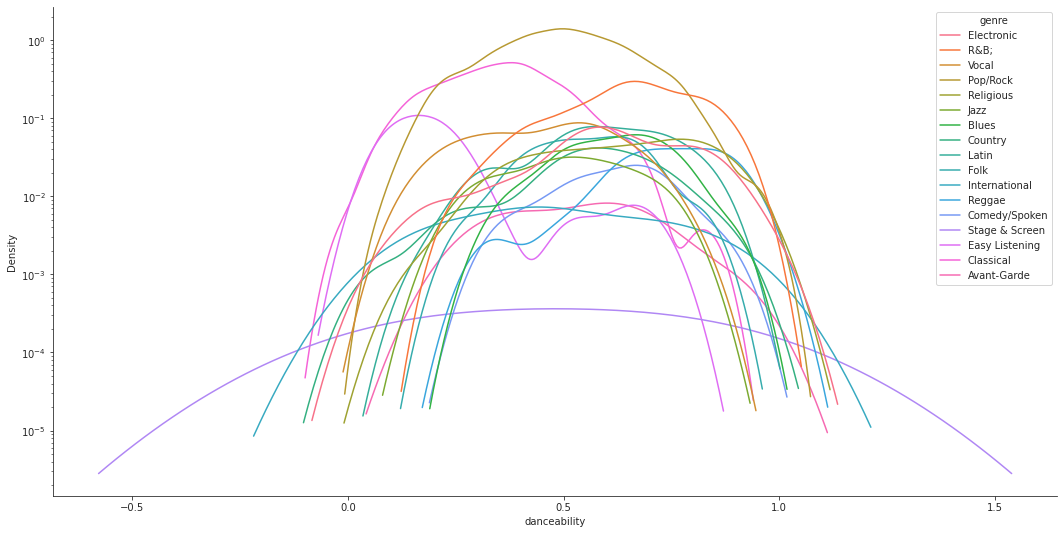

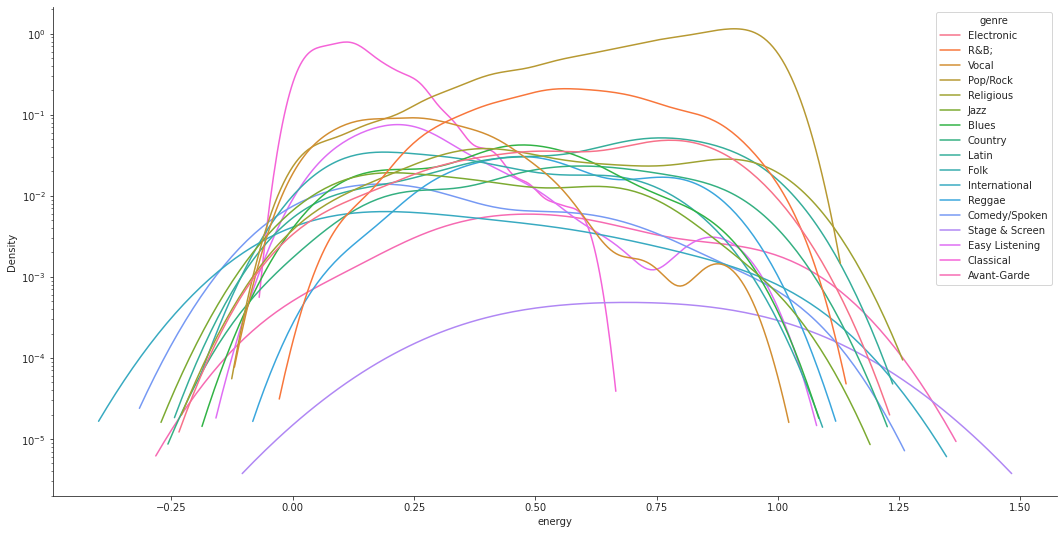

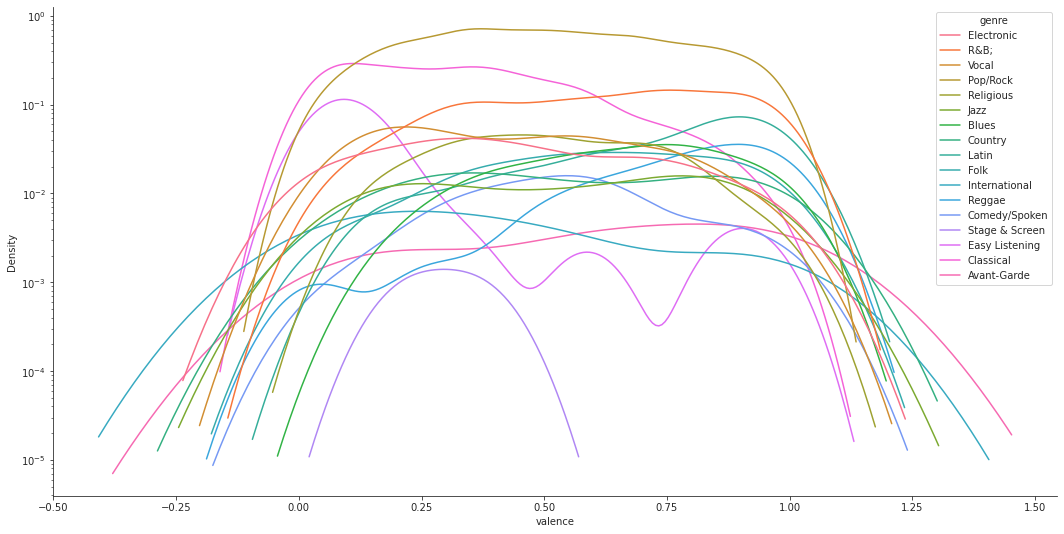

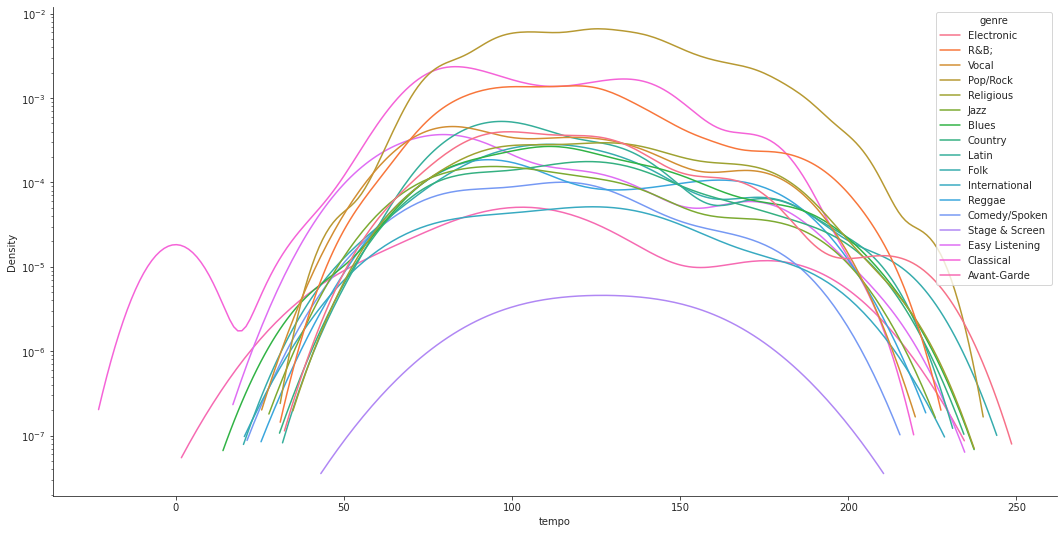

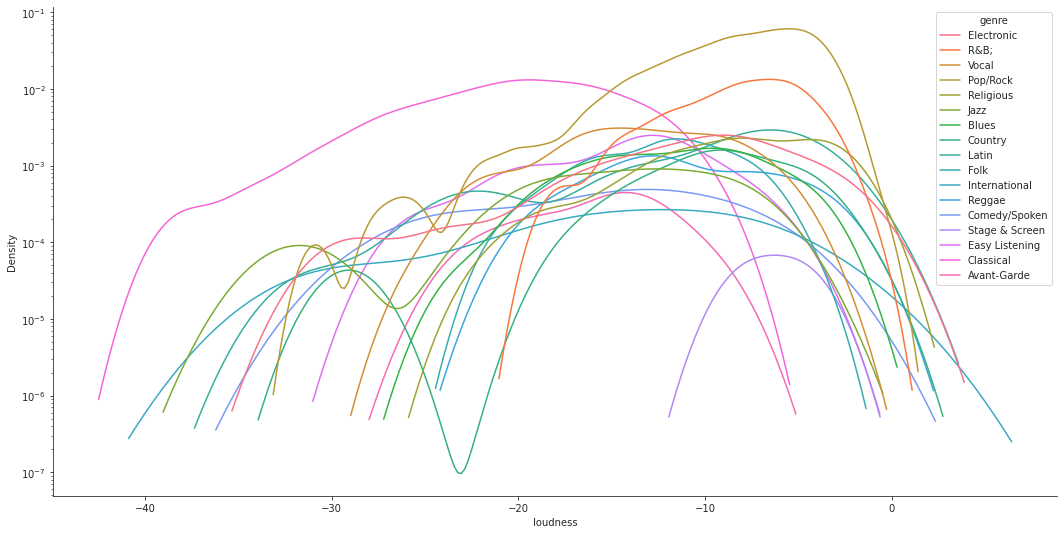

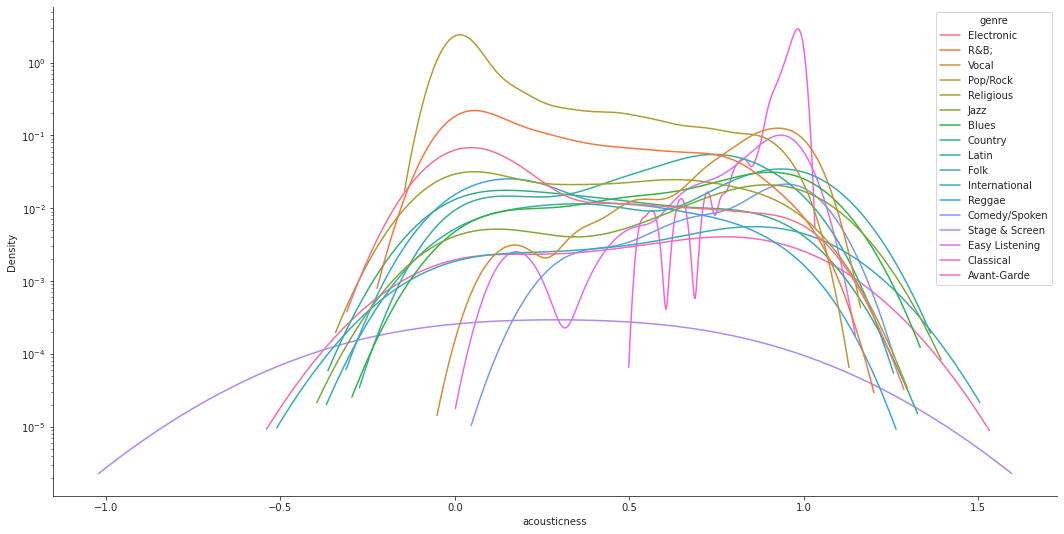

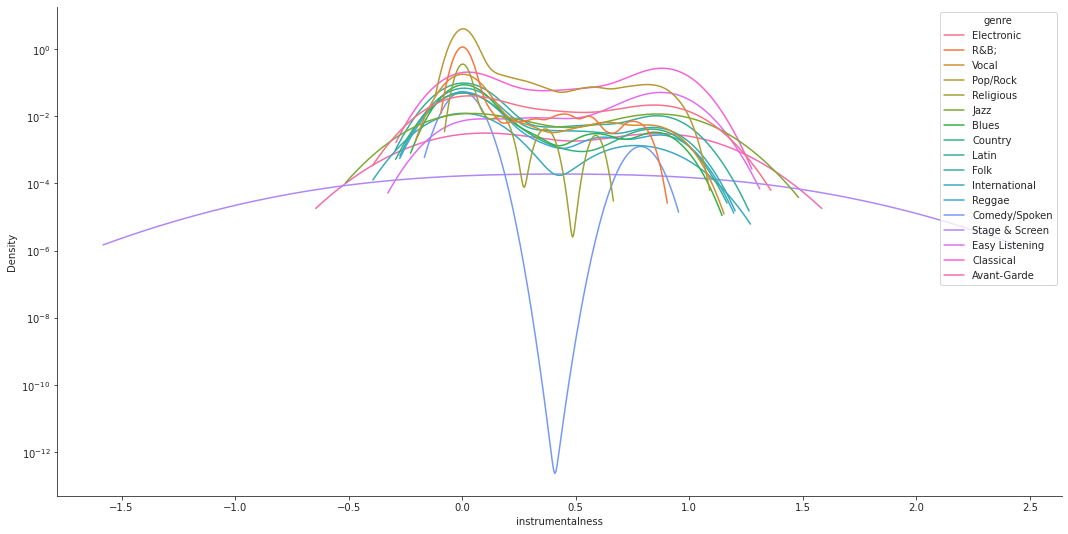

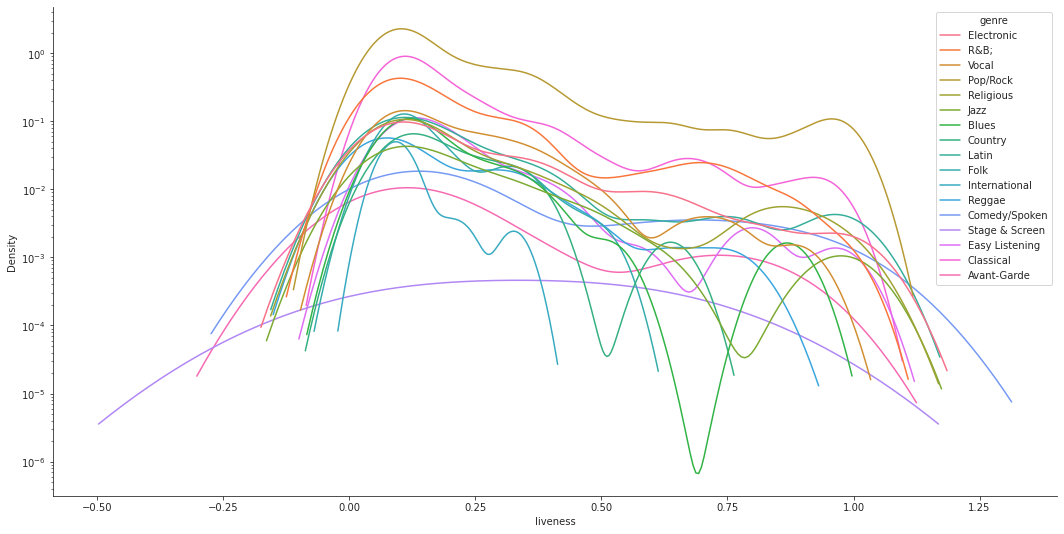

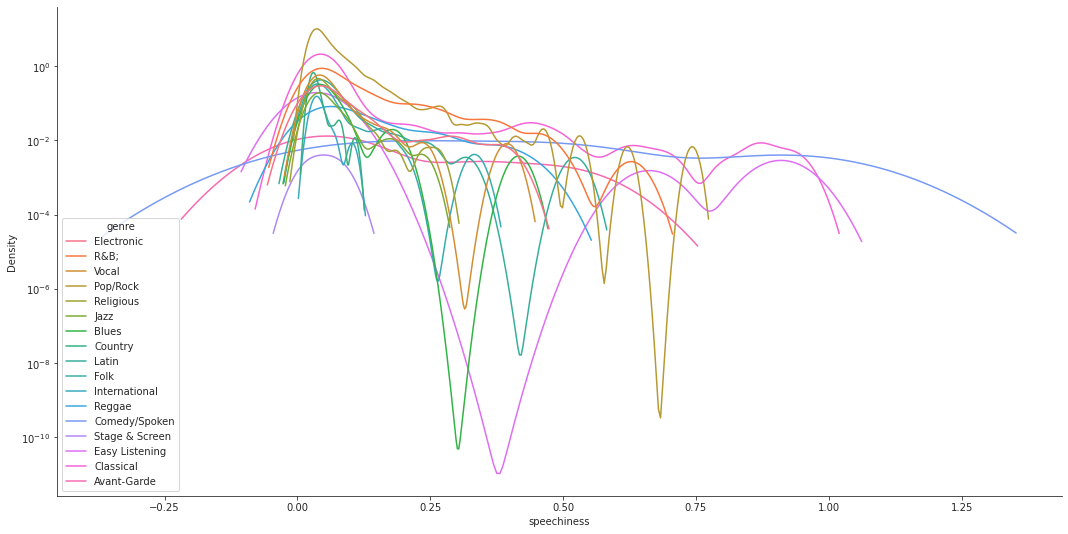

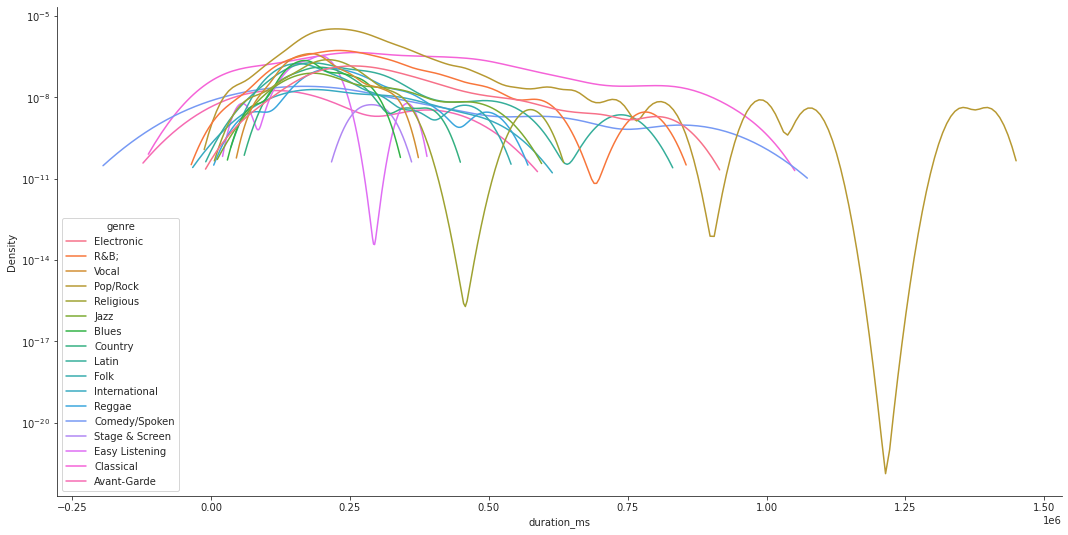

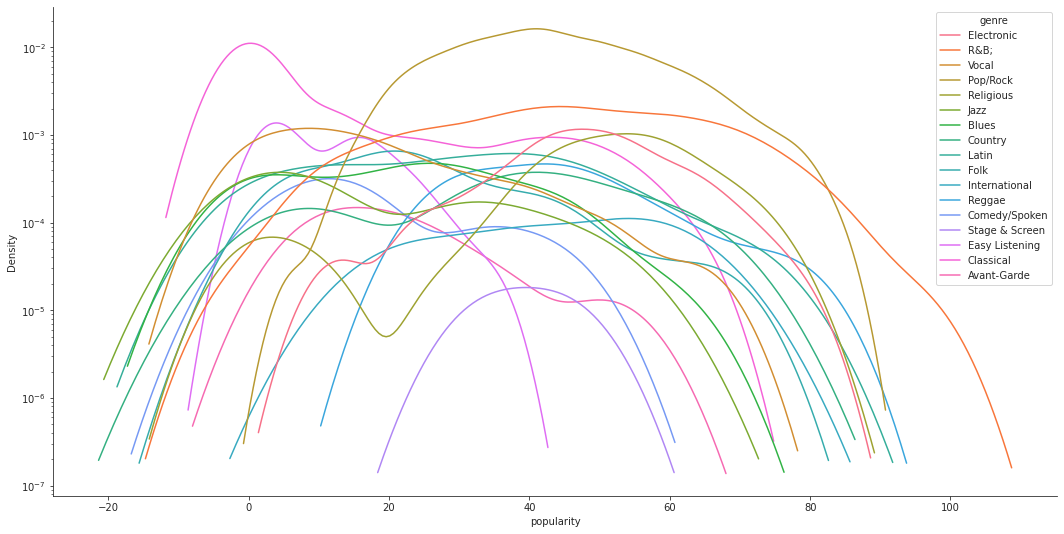

In [54]:
fullData['danceability'] = fullData['danceability'].astype('float')

plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='danceability', hue='genre',
#    fill=True, common_norm=False, palette="bright",
#    alpha=.2, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/danceability.jpg', dpi=600)



plt.figure(figsize=(18, 9))
pyplot.yscale('log')

fullData['energy'] = fullData['energy'].astype('float')


sns.kdeplot(

   data=fullData, x='energy', hue='genre',
#     fill=True, common_norm=False, palette="crest",
#    alpha=.3, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/energy.jpg', dpi=600)

fullData['valence'] = fullData['valence'].astype('float')


plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='valence', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.3, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/valence.jpg', dpi=600)

fullData['tempo'] = fullData['tempo'].astype('float')


plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='tempo', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.3, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/tempo.jpg', dpi=600)


fullData['loudness'] = fullData['loudness'].astype('float')


plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='loudness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/loudness.jpg', dpi=600)

fullData['acousticness'] = fullData['acousticness'].astype('float')


plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='acousticness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/acousticness.jpg', dpi=600)

fullData['instrumentalness'] = fullData['instrumentalness'].astype('float')


plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='instrumentalness', hue='genre',
#    fill=True, common_norm=False, palette="bright",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/instrumentalness.jpg', dpi=600)

fullData['liveness'] = fullData['liveness'].astype('float')


plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='liveness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/liveness.jpg', dpi=600)

fullData['speechiness'] = fullData['speechiness'].astype('float')


plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='speechiness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/speechiness.jpg', dpi=600)

fullData['duration_ms'] = fullData['duration_ms'].astype('float')


plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='duration_ms', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/duration_ms.jpg', dpi=600)

fullData['popularity'] = fullData['popularity'].astype('float')


plt.figure(figsize=(18, 9))
pyplot.yscale('log')

sns.kdeplot(
   data=fullData, x='popularity', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('/content/sample_data/popularity.jpg', dpi=600)


# VIZs

# the artists grouped by genre, their popularity through the years

         genre active_start_year  popul_by_genre
0        Vocal              1930       23.199897
2      Country              1950       34.167854
3        Vocal              1930       23.199897
4     Pop/Rock              1960       39.051741
5     Pop/Rock              1960       39.051741
...        ...               ...             ...
5849      R&B;              1970       42.768250
5850   Country              1930       23.941411
5851      R&B;              2000       55.926793
5852   Country              1950       34.167854
5853  Pop/Rock              2000       53.565912

[5602 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


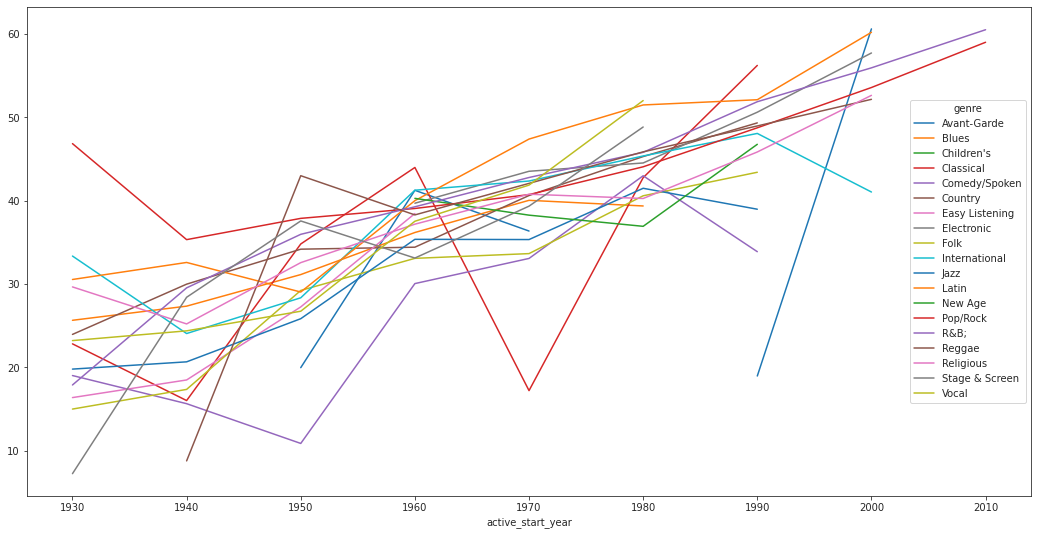

In [55]:

artistData['popul_by_artist_genre'] = artistData.groupby(['artist_name','genre'])['popularity'].transform('mean') 
artistData_plots = artistData[['genre','active_start_year','popul_by_artist_genre']]
artistData_plots['popul_by_genre'] = artistData_plots.groupby(['genre','active_start_year'])['popul_by_artist_genre'].transform('mean') 
del artistData_plots['popul_by_artist_genre'] 

print(artistData_plots)



fig, ax = plt.subplots(figsize=(18,9))
# use unstack()

artistData_plots.groupby(['active_start_year','genre']).mean()['popul_by_genre'].unstack().plot(ax=ax)

# The second chart are the songs grouped by genre, theirpopularity through the years.

In [56]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695 entries, 0 to 5853
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   artist_names           5695 non-null   object 
 1   artists_id             5695 non-null   object 
 2   danceability           5695 non-null   float64
 3   energy                 5695 non-null   float64
 4   valence                5695 non-null   float64
 5   tempo                  5695 non-null   float64
 6   loudness               5695 non-null   float64
 7   mode                   5695 non-null   float64
 8   key                    5695 non-null   float64
 9   acousticness           5695 non-null   float64
 10  instrumentalness       5695 non-null   float64
 11  liveness               5695 non-null   float64
 12  speechiness            5695 non-null   float64
 13  explicit               5695 non-null   float64
 14  duration_ms            5695 non-null   float64
 15  popu

In [57]:
fullData['year']

0       2005.0
1       2005.0
2       2009.0
3       1991.0
4       1987.0
         ...  
5849    1978.0
5850    1985.0
5851    1985.0
5852    1986.0
5853    1994.0
Name: year, Length: 5695, dtype: float64

In [58]:
fullData['year'] = pd.cut(fullData['year'], bins=[1910, 1920, 1930, 1940, 1950,1960,1970,1980,1990,2000,2010,2020])

           genre          year  popul_by_genre
0     Electronic  (2000, 2010]       50.802083
1     Electronic  (2000, 2010]       50.802083
2     Electronic  (2000, 2010]       50.802083
3           R&B;  (1990, 2000]       44.941520
4           R&B;  (1980, 1990]       36.686275
...          ...           ...             ...
5849    Pop/Rock  (1970, 1980]       38.124598
5850    Pop/Rock  (1980, 1990]       38.404190
5851    Pop/Rock  (1980, 1990]       38.404190
5852    Pop/Rock  (1980, 1990]       38.404190
5853    Pop/Rock  (1990, 2000]       45.335395

[5695 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


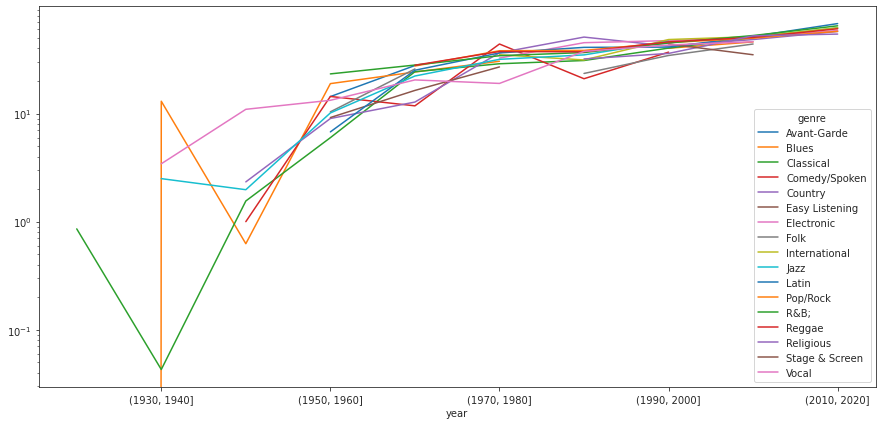

In [59]:
fullData['popul_by_song_genre'] = fullData.groupby(['song_title (censored)','genre'])['popularity'].transform('mean') 
fullData_plots = fullData[['genre','year','popul_by_song_genre']]
fullData_plots['popul_by_genre'] = fullData_plots.groupby(['genre','year'])['popul_by_song_genre'].transform('mean') 
del fullData_plots['popul_by_song_genre'] 

print(fullData_plots)




fig, ax = plt.subplots(figsize=(15,7))
pyplot.yscale('log')
# use unstack()
fullData_plots.groupby(['year','genre']).mean()['popul_by_genre'].unstack().plot(ax=ax)

# OLS PART

In [60]:
import pandas as pd
from sklearn import datasets
import tensorflow as tf
import itertools

In [61]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [62]:
del artistData_plots['active_start_year']

In [63]:
artistData_plots

,genre,popul_by_genre
0,Vocal,23.199897
2,Country,34.167854
3,Vocal,23.199897
4,Pop/Rock,39.051741
5,Pop/Rock,39.051741
...,...,...
5849,R&B;,42.768250
5850,Country,23.941411
5851,R&B;,55.926793
5852,Country,34.167854


In [64]:
X = pd.get_dummies(artistData_plots.genre, prefix='', prefix_sep='')

X

,Avant-Garde,Blues,Children's,Classical,Comedy/Spoken,Country,Easy Listening,Electronic,Folk,International,Jazz,Latin,New Age,Pop/Rock,R&B;,Reggae,Religious,Stage & Screen,Vocal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5850,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5852,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
labels = artistData_plots.popul_by_genre

In [66]:
y = labels.values

In [67]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     327.9
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:11:30   Log-Likelihood:                -17710.
No. Observations:                5602   AIC:                         3.546e+04
Df Residuals:                    5583   BIC:                         3.558e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Avant-Garde       37.8357      1.809     20.912      0.000      34.289      41.383
Blues             29.7907      0.538     55.351      0.000      28.736      30.846
Children's        34.0692      2.861     11.910      0.000      28.461      39.677
Classical         30.6199      1.062     28.821      0.000      28.537      32.703
Comedy/Spoken     29.9372      0.826     36.252      0.000      28.318      31.556
Country           37.8808      0.286    132.585      0.000      37.321      38.441
Easy Listening    24.7943      1.101     22.518      0.000      22.636      26.953
Electronic        48.2932      0.431    111.981      0.000      47.448      49.139
Folk              30.0270      0.556     54.034      0.000      28.938      31.116
International     36.8174      0.613     60.023      0.000      35.615      38.020
Jazz              26.3272      0.281     93.854      0.000      25.777      26.877
Latin             41.7440      0.387    107.974      0.000      40.986      42.502
New Age           38.6921      1.028     37.654      0.000      36.678      40.707
Pop/Rock          42.7537      0.110    389.584      0.000      42.539      42.969
R&B;              42.4099      0.208    203.677      0.000      42.002      42.818
Reggae            42.3528      0.478     88.522      0.000      41.415      43.291
Religious         39.4609      0.632     62.456      0.000      38.222      40.699
Stage & Screen    31.0413      0.826     37.589      0.000      29.422      32.660
Vocal             26.4507      0.416     63.558      0.000      25.635      27.267
==============================================================================
Omnibus:                      141.030   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.398
Skew:                           0.176   Prob(JB):                     1.92e-59
Kurtosis:                       4.017   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# AFTER  caging the popularity value of the country genre, we conducted a new OLS model to see how will be the change. 

In [68]:
artistData_plots.loc[artistData_plots.genre == 'Country','popul_by_genre'] = 49

art_reg = artistData_plots


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [69]:
X1 = pd.get_dummies(art_reg.genre, prefix='', prefix_sep='')
labels = art_reg.popul_by_genre
y1 = labels.values

In [70]:
import statsmodels.api as sm
model = sm.OLS(y1, X1.astype(float)).fit()
predictions = model.predict(X1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     431.0
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:11:31   Log-Likelihood:                -17350.
No. Observations:                5602   AIC:                         3.474e+04
Df Residuals:                    5583   BIC:                         3.486e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Avant-Garde       37.8357      1.696     22.303      0.000      34.510      41.161
Blues             29.7907      0.505     59.032      0.000      28.801      30.780
Children's        34.0692      2.682     12.702      0.000      28.811      39.328
Classical         30.6199      0.996     30.738      0.000      28.667      32.573
Comedy/Spoken     29.9372      0.774     38.663      0.000      28.419      31.455
Country           49.0000      0.268    182.909      0.000      48.475      49.525
Easy Listening    24.7943      1.032     24.016      0.000      22.770      26.818
Electronic        48.2932      0.404    119.429      0.000      47.500      49.086
Folk              30.0270      0.521     57.628      0.000      29.006      31.048
International     36.8174      0.575     64.015      0.000      35.690      37.945
Jazz              26.3272      0.263    100.096      0.000      25.812      26.843
Latin             41.7440      0.363    115.155      0.000      41.033      42.455
New Age           38.6921      0.964     40.158      0.000      36.803      40.581
Pop/Rock          42.7537      0.103    415.494      0.000      42.552      42.955
R&B;              42.4099      0.195    217.223      0.000      42.027      42.793
Reggae            42.3528      0.449     94.410      0.000      41.473      43.232
Religious         39.4609      0.592     66.610      0.000      38.299      40.622
Stage & Screen    31.0413      0.774     40.089      0.000      29.523      32.559
Vocal             26.4507      0.390     67.785      0.000      25.686      27.216
==============================================================================
Omnibus:                      251.567   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.752
Skew:                           0.206   Prob(JB):                    2.75e-150
Kurtosis:                       4.668   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""